In [1]:
import pandas as pd
import numpy as np

In [2]:
# Question 1

df=pd.read_csv("temp_1986.csv")
df1=pd.read_csv("stations.csv")

df.columns=["Station ID","WBAN ID","Month","Day","Temperature"]
df1.columns=["Station ID","WBAN ID","GPS Latitude","GPS Longitude"]

In [3]:
# Question 2

del df["WBAN ID"]
del df1['WBAN ID']

df=df.dropna()
df1=df1.dropna()
df1 = df1[df1['Station ID'].notna()]
df1=df1[df1["GPS Latitude"]!=0]
df1=df1[df1["GPS Longitude"]!=0]


In [4]:
# Question 3

# Haversine Distance Function

import math

def HavDist(la,lo):
    lat1 = 28.396837
    lon1 = -80.605659
    lat2 = la
    lon2 = lo 
    radius = 6335.439 # Approximate curvature of earth

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

Li=list(df1["GPS Latitude"])
Yi=list(df1["GPS Longitude"])
k=0
Di=[]
for i in Li:
    j=Yi[k]
    dist=HavDist(i,j)
    Di.append(dist)
    k=k+1
    
d_df=pd.DataFrame(Di)
d_df.columns=["Distance"]
d_df["Station ID"]=df1["Station ID"]
#d_df=d_df[d_df["Distance"]<100]
d_df=d_df.dropna()

d_df     # Answer 3

,Distance,Station ID
17,7354.601706,8268.0
39,7449.636587,10010.0
41,7484.726244,10014.0
42,7459.111457,10015.0
43,7458.604599,10016.0
...,...,...
26384,7352.686764,966334.0
26385,8439.862231,966335.0
26386,8732.323365,966336.0
26387,8472.332307,966450.0


In [5]:
# Question 4


mer_df = pd.merge(left=d_df, right=df, left_on='Station ID', right_on='Station ID')

mer_df["Inv_dist"]=1/(mer_df.Distance **1)
mer_df['Weights'] = mer_df.Temperature * mer_df.Inv_dist
mer_df1=mer_df[mer_df.Month==1]


#mer_df1.groupby('Day').Weights.sum() / mer_df1.groupby('Day').Inv_dist.sum()
grouped = mer_df1.groupby('Day').sum()[['Inv_dist', 'Weights']]
grouped['Final'] = grouped.Weights / grouped.Inv_dist

grouped

# Answer 4
# TEMPERATURE ON 28TH JANUARY IS ESTIMATED TO BE 25.75 DEGREES

,Inv_dist,Weights,Final
Day,,,
1,2.176064,69.542864,31.958098
2,2.318015,70.784489,30.536683
3,2.302379,71.568751,31.084692
4,2.250301,64.113084,28.490891
5,2.197554,61.506223,27.988495
6,2.299708,67.518222,29.359479
7,2.287339,60.615808,26.500581
8,2.319973,61.821769,26.647625
9,2.335013,71.778465,30.740077


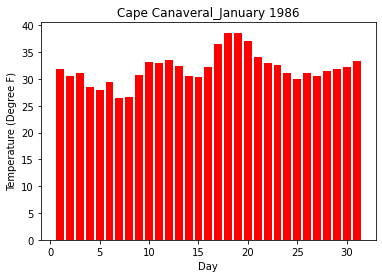

In [6]:
# Question 5

import matplotlib.pyplot as plt
grouped=grouped.reset_index()
plt.title("Cape Canaveral_January 1986")
plt.xlabel("Day")
plt.ylabel("Temperature (Degree F)")
plt.bar(grouped["Day"], grouped["Final"], color="red")
plt.show()

In [ ]:
#Part2
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
df = pd.read_csv('temp_1986')

lon = np.array([[]])
lat = np.array([[]])
v = np.array([[]])

trace = go.Heatmap(z=v,x=lon,y=lat)
data=[trace]